In [1]:
import sys
if "../.." not in sys.path: sys.path.insert(0, "../..")
if ".." not in sys.path: sys.path.insert(0, "..")

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns

from experiment.v1dd_client import V1DDClient
from experiment.v1dd_ophys_session import V1DDOPhysSession
from stimulus_analysis.drifting_gratings import DriftingGratings

import stimulus_analysis.timing_utils as tu
import analysis_tools as at
at.set_stylesheet()

%load_ext autoreload
%autoreload 2

In [2]:
client = V1DDClient("/Users/chase/Desktop/test_v1dd_data")

In [3]:
session = client.load_ophys_session(mouse=409828, column=1, volume=3)

In [4]:
plane = 5

In [5]:
valid_rois = np.where(session.is_roi_valid(plane=plane))[0]
len(valid_rois)

438

In [6]:
running_speed, running_timestamps = session.get_running_speed()

In [7]:
dgw = DriftingGratings(session, plane, "windowed")
dgw.n_chisq_shuffles = 10
dgw.n_null_distribution_boot = 100

In [8]:
dgw.metrics

Loading DG-windowed response metrics for session M409828_13, plane 5...


,pref_response,pref_dir,pref_sf,pref_dir_idx,pref_sf_idx,pref_dir_mean,z_score,response_p,osi,gosi,...,vonmises_1_peak_amp,vonmises_1_r2_score,norm_dir_responses,is_valid,pref_ori,chisq_response_p,null_dist_multi_mean,null_dist_multi_std,null_dist_single_mean,null_dist_single_std
0,0.002347,60,0.04,2,0,88.975827,1.60312,0.11,0.432155,0.169246,...,0.000976,0.413922,"[-0.07167484, 0.43089947, 1.3103894, 0.1430329...",True,60,0.6,0.000919,0.000891,0.000794,0.001948
1,0.001103,300,0.04,10,0,205.447703,3.520979,0.01,0.124465,0.031829,...,0.000804,0.876715,"[0.19694123, 0.35913226, -0.32487258, 0.492732...",True,120,0.8,0.000355,0.000212,0.000413,0.000974
2,0.003153,180,0.04,6,0,116.65171,0.441502,0.28,0.697107,0.33428,...,0.001235,0.072772,"[-0.24829857, 0.36039263, 0.46629664, -0.25728...",True,0,0.2,0.002274,0.00199,0.001388,0.004188
3,0.001312,90,0.08,3,1,126.365235,2.818021,0.01,0.21167,0.128881,...,0.001019,0.378592,"[0.2721001, -0.05866727, 0.10737289, 0.7893588...",True,90,0.7,0.000489,0.000292,0.000431,0.000738
4,0.035135,300,0.08,10,1,306.400674,188.83189,0.0,0.974375,0.752944,...,0.035721,0.989777,"[0.27311394, 0.09368438, 0.11424376, 0.0445842...",True,120,0.0,0.000345,0.000184,0.000392,0.000613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,NaN,False,<NA>,0.8,0.000493,0.0003,0.000656,0.000956
1154,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,NaN,False,<NA>,1.0,0.000526,0.000268,0.000522,0.000824
1155,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,NaN,False,<NA>,0.1,0.000627,0.000331,0.00071,0.001191
1156,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,NaN,False,<NA>,0.9,0.000566,0.000251,0.000428,0.000759


# Identify where the mouse is running

In [9]:
stim_table = dgw.stim_table
stim_table

,start,end,temporal_frequency,spatial_frequency,direction
0,344.876038,346.861023,1.0,0.04,330.0
1,347.878540,349.863525,1.0,0.08,0.0
2,350.881042,352.865967,NaN,NaN,NaN
3,353.883514,355.868500,1.0,0.04,90.0
4,356.886017,358.871033,1.0,0.08,120.0
...,...,...,...,...,...
187,2687.826904,2689.812012,1.0,0.04,330.0
188,2690.829590,2692.814453,1.0,0.04,270.0
189,2693.832031,2695.816895,1.0,0.08,300.0
190,2696.834473,2698.819580,1.0,0.04,180.0


In [10]:
stim_table.start.values

array([ 344.87604,  347.87854,  350.88104,  353.8835 ,  356.88602,
        359.88852,  362.89102,  365.89355,  368.89603,  371.89862,
        374.90103,  377.90353,  380.90604,  383.9085 ,  386.911  ,
        389.91354,  392.91602,  395.91852,  398.92102,  401.92355,
        404.92603,  407.92856,  410.93103,  413.93353,  416.936  ,
        419.93854,  422.94104,  425.9435 ,  428.94604,  431.94855,
        434.95102,  437.95352,  440.95602,  443.95856,  446.96103,
        449.96353,  452.96606,  455.96854,  458.9711 ,  461.97354,
        464.976  ,  467.97855,  470.98102,  473.98355,  476.98602,
        479.98853,  482.99106,  485.99353,  488.99606,  491.99854,
        495.00104,  498.00354,  501.00604,  504.00854,  507.01105,
        510.01364,  513.0161 ,  516.01855,  519.02106,  522.02356,
        525.02606,  528.02856,  531.03107,  534.0335 ,  537.0361 ,
        540.0386 ,  543.041  ,  546.0435 ,  549.0461 ,  552.0485 ,
        555.051  ,  558.0535 ,  561.056  ,  564.05853,  567.06

(-10.0, 100.0)

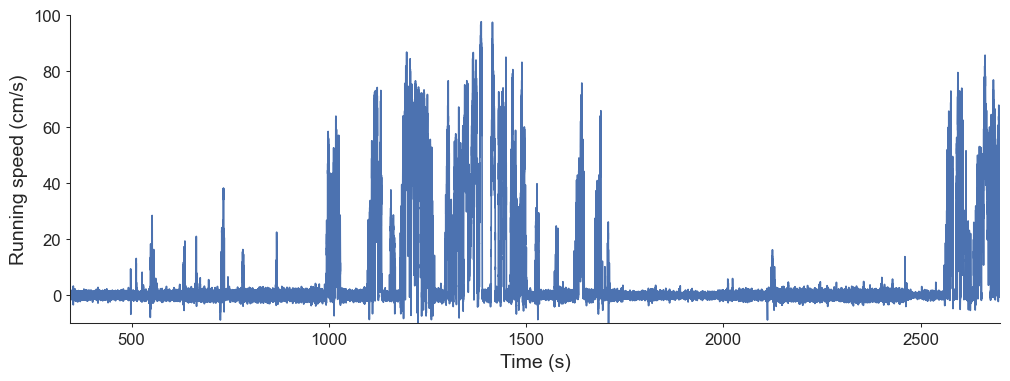

In [11]:
# Plot running speed during DGW
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(running_timestamps, running_speed)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Running speed (cm/s)")
ax.set_xlim(stim_table.start.min(), stim_table.end.max())
ax.set_ylim(-10, 100)

Text(0.5, 1.0, 'Stationary vs running DGW trials')

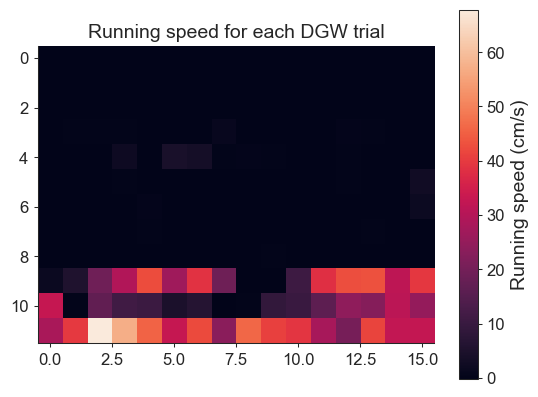

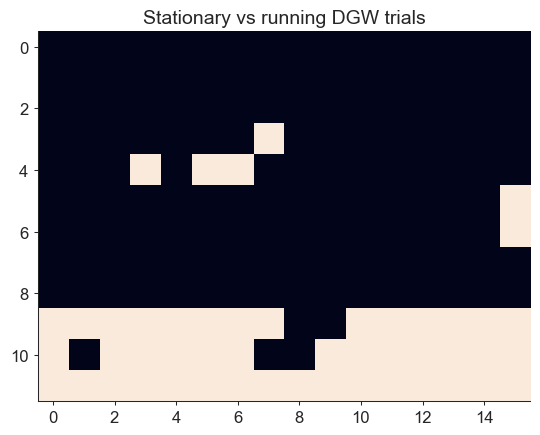

In [12]:
RUNNING_THRESHOLD = 1 # cm/s
RUNNING_PADDING = 0 # s; padding around stimulus onset/offset to get running trace

stim_table = dgw.stim_table
running_speed_by_stim_trial = np.empty(len(stim_table), dtype=float)

for i, row in stim_table.iterrows():
    start, end = row["start"], row["end"]
    start -= 0.5
    end += 0.5

    run_idx_start = tu.find_nearest(running_timestamps, start, direction=-1)
    run_idx_end = tu.find_nearest(running_timestamps, end, direction=1)
    mean_run = np.mean(running_speed[run_idx_start:run_idx_end+1]) # cm/s; mean running speed during stimulus sweep
    running_speed_by_stim_trial[i] = mean_run

plt.imshow(running_speed_by_stim_trial.reshape((12, -1)))
plt.colorbar(label="Running speed (cm/s)")
plt.title("Running speed for each DGW trial")
plt.figure()
plt.imshow(running_speed_by_stim_trial.reshape((12, -1)) > RUNNING_THRESHOLD)
plt.title("Stationary vs running DGW trials")

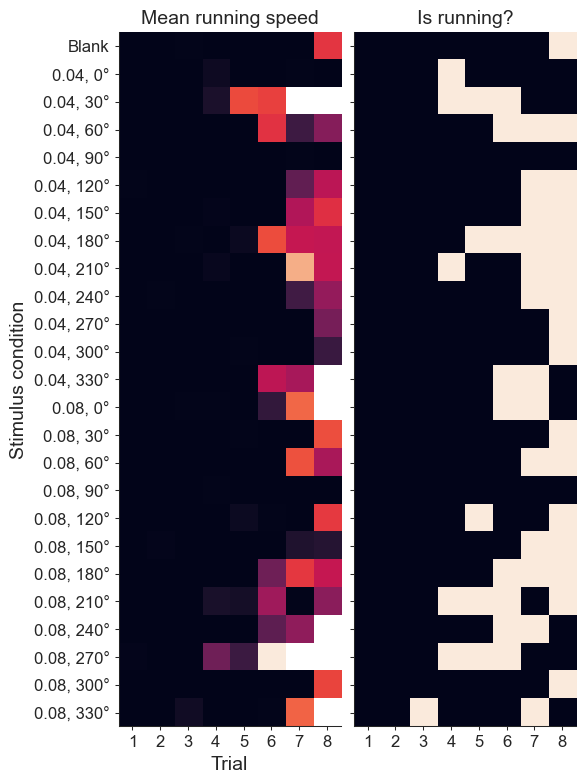

In [13]:
sf_list = sorted(stim_table.spatial_frequency.dropna().unique())
dir_list = sorted(stim_table.direction.dropna().unique())
mean_run_by_stim_category = np.zeros((1 + len(sf_list)*len(dir_list), dgw.n_trials)) * np.nan # +1 for blank trial

# null trial
for j, stim_i in enumerate(dgw.get_stim_idx(None, None)):
    mean_run_by_stim_category[0, j] = running_speed_by_stim_trial[stim_i]

for sf_i, sf in enumerate(sf_list):
    for dir_i, dir in enumerate(dir_list):
        cat_i = 1 + sf_i*len(dir_list) + dir_i

        for j, stim_i in enumerate(dgw.get_stim_idx(dir, sf)):
            mean_run_by_stim_category[cat_i, j] = running_speed_by_stim_trial[stim_i]

xticks = np.arange(mean_run_by_stim_category.shape[1])
xticklabels = xticks + 1
yticks = np.arange(mean_run_by_stim_category.shape[0])
yticklabels = []
for i in yticks:
    if i == 0:
        yticklabels.append("Blank")
    else:
        i -= 1
        sf_i = int(i / len(dir_list))
        dir_i = i - sf_i*len(dir_list)
        yticklabels.append(f"{sf_list[sf_i]:.2f}, {dir_list[dir_i]:.0f}°")

fig, axs = plt.subplots(figsize=(6, 8), ncols=2)
axs[0].imshow(mean_run_by_stim_category)
axs[0].set_title("Mean running speed")
axs[0].set_xlabel("Trial")
axs[0].set_ylabel("Stimulus condition")
axs[0].set_yticks(ticks=yticks, labels=yticklabels)
axs[0].set_xticks(ticks=xticks, labels=xticklabels)
axs[1].imshow(mean_run_by_stim_category > RUNNING_THRESHOLD)
axs[1].set_yticks(ticks=yticks, labels=[])
axs[1].set_xticks(ticks=xticks, labels=xticklabels)
axs[1].set_title("Is running?")
fig.tight_layout()

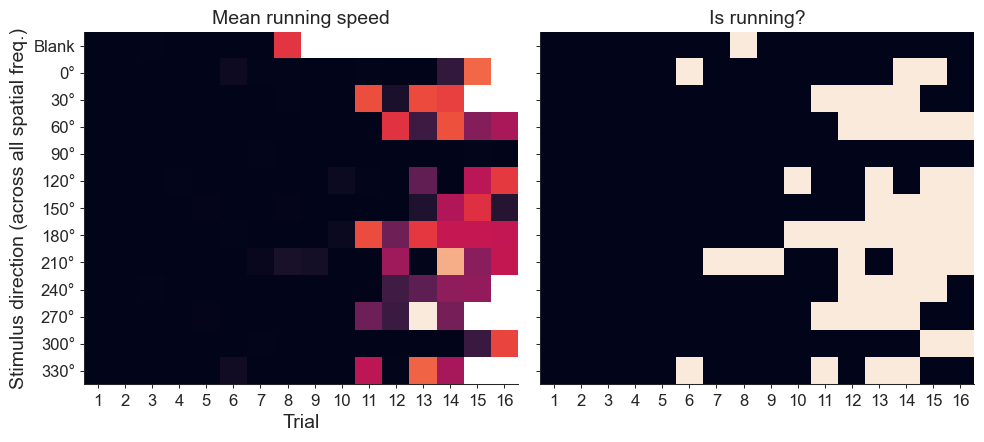

In [14]:
# Across all spatial frequencies
mean_run_by_stim_dir = np.zeros((1 + len(dir_list), dgw.n_trials*len(sf_list))) * np.nan # +1 for blank trial

# null trial
for j, stim_i in enumerate(dgw.get_stim_idx(None, None)):
    mean_run_by_stim_dir[0, j] = running_speed_by_stim_trial[stim_i]

for dir_i, dir in enumerate(dir_list):
    cat_i = 1 + dir_i

    for j, stim_i in enumerate(dgw.get_stim_idx(dir, None)):
        mean_run_by_stim_dir[cat_i, j] = running_speed_by_stim_trial[stim_i]

xticks = np.arange(mean_run_by_stim_dir.shape[1])
xticklabels = xticks + 1
yticks = np.arange(mean_run_by_stim_dir.shape[0])
yticklabels = ["Blank"] + [f"{d:.0f}°" for d in dir_list]

fig, axs = plt.subplots(figsize=(10, 5), ncols=2)
axs[0].imshow(mean_run_by_stim_dir)
axs[0].set_title("Mean running speed")
axs[0].set_xlabel("Trial")
axs[0].set_ylabel("Stimulus direction (across all spatial freq.)")
axs[0].set_yticks(ticks=yticks, labels=yticklabels)
axs[0].set_xticks(ticks=xticks, labels=xticklabels)
axs[1].imshow(mean_run_by_stim_dir > RUNNING_THRESHOLD)
axs[1].set_yticks(ticks=yticks, labels=[])
axs[1].set_xticks(ticks=xticks, labels=xticklabels)
axs[1].set_title("Is running?")
fig.tight_layout()

# Plot responses for ROI to discriminate running modulation

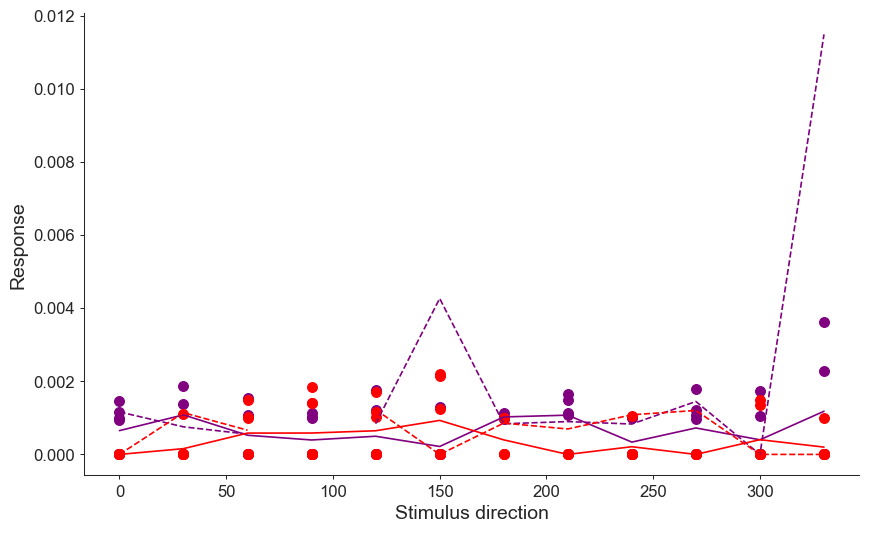

In [53]:
roi = 4
roi = 5
roi = 149

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlabel("Stimulus direction")
ax.set_ylabel("Response")

# Null responses
# TODO plot at -10

sf_colors = ["purple", "red"]

for sf_i, sf in enumerate(sf_list):
    color = sf_colors[sf_i]
    mean_resp_run = []
    mean_resp_still = []

    for dir_i, dir in enumerate(dir_list):
        r_run = []
        r_still = []

        for j, stim_i in enumerate(dgw.get_stim_idx(dir, sf)):
            resp = dgw.sweep_responses[stim_i, roi]
            mean_run = running_speed_by_stim_trial[stim_i]
            is_stationary = mean_run < RUNNING_THRESHOLD


            if is_stationary:
                scatter_kws = dict()
                r_still.append(resp)
            else:
                scatter_kws = dict(facecolors="none")
                r_run.append(resp)

            # if is_stationary:
            plt.scatter(dir, resp, color=color, s=50, **scatter_kws)

        mean_resp_run.append(np.nan if len(r_run) == 0 else np.mean(r_run))
        mean_resp_still.append(np.nan if len(r_still) == 0 else np.mean(r_still))
    
    plt.plot(dir_list, mean_resp_run, color=color, linestyle="dashed")
    plt.plot(dir_list, mean_resp_still, color=color)

# Can we justify averaging across spatial frequencies? (A: No)

In [15]:
dgf = DriftingGratings(session, plane, "full")

In [27]:
rois = dgw.metrics.index[dgw.metrics.frac_responsive_trials >= 0.5].values
rois

array([  4,   5,   8,  14,  15,  17,  18,  19,  22,  25,  26,  27,  29,
        31,  32,  36,  44,  48,  50,  51,  54,  60,  63,  65,  67,  72,
        75,  83,  85,  87,  95, 111, 112, 118, 122, 125, 128, 135, 136,
       137, 139, 141, 145, 147, 149, 151, 153, 158, 159, 163, 175, 176,
       177, 178, 184, 189, 192, 196, 200, 207, 223, 225, 226, 235, 238,
       244, 247, 251, 253, 256, 258, 260, 269, 270, 271, 276, 277, 279,
       280, 282, 295, 297, 298, 307, 309, 312, 313, 321, 334, 342, 347,
       350, 355, 356, 359, 360, 384, 391, 401, 403, 409, 415, 435, 437,
       445, 455, 469, 471, 506, 510, 539, 552, 554, 562, 564, 566, 608,
       708])

In [168]:
dgw.metrics.pref_sf.iloc[rois].value_counts()

0.04    83
0.08    45
Name: pref_sf, dtype: Int64

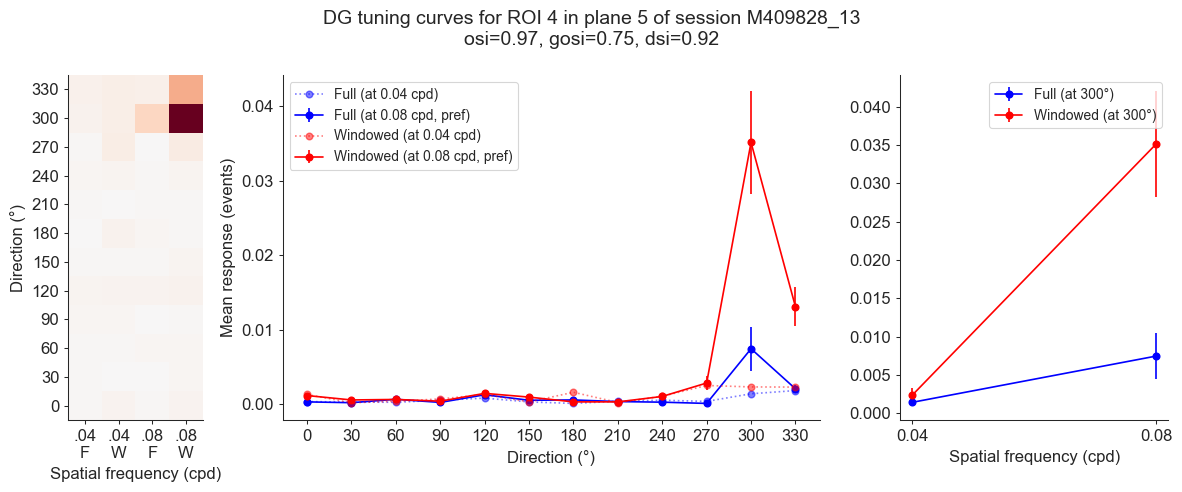

In [29]:
_ = dgw.plot_roi_tuning_curves(roi=valid_rois[rois[0]], plot_all_sf=True, dg_other=dgf)

In [85]:
np.sum(~np.isnan(dgw.trial_responses[0]), axis=2)

array([[8, 7],
       [6, 8],
       [8, 8],
       [8, 8],
       [8, 8],
       [8, 8],
       [8, 8],
       [8, 8],
       [8, 7],
       [8, 6],
       [8, 8],
       [7, 7]])

(array([11., 34., 87., 81., 71.]),
 array([0., 1., 2., 3., 4., 5.]),
 <BarContainer object of 5 artists>)

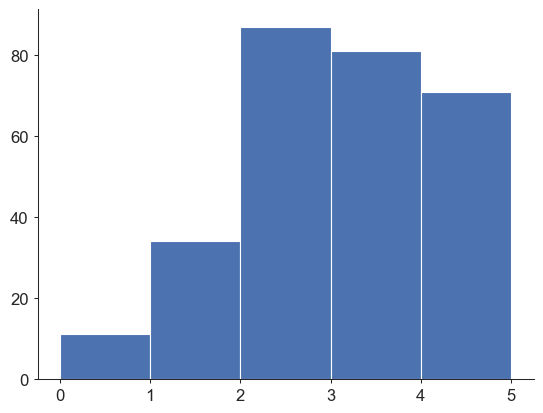

In [22]:
plt.hist(dgw.metrics[dgw.metrics.is_valid].z_score, bins=np.arange(6))

(-10.0, 100.0)

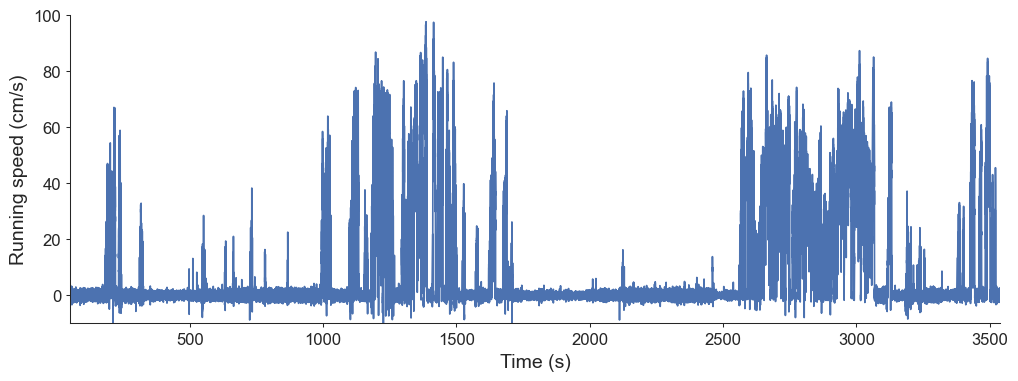